In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
import pandas as pd
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
train=pd.read_csv('/kaggle/input/nlp-getting-started/train.csv',usecols=[0,3,4])
test=pd.read_csv('/kaggle/input/nlp-getting-started/test.csv',usecols=[0,3])
train.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
test.head()
train.info()
for i in train.columns:
    print(i, train[i].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7613 non-null   int64 
 1   text    7613 non-null   object
 2   target  7613 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 178.6+ KB
id 0
text 0
target 0


In [4]:
for i in test.columns:
    print(i, test[i].isnull().sum())

id 0
text 0


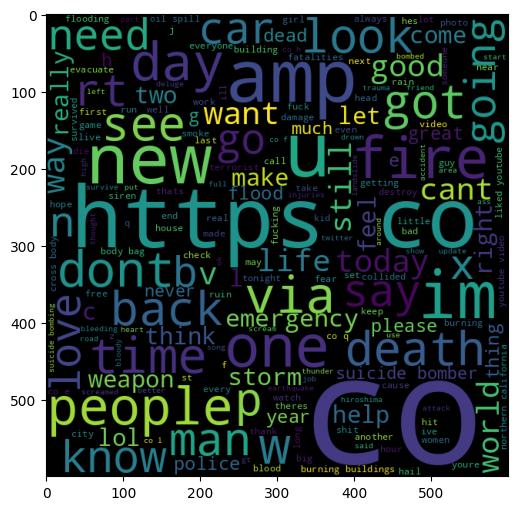

In [5]:
x=train['text']
y=train['target']
def clean_text(text):
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z]"," ",text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    return text
x=x.apply(lambda x: clean_text(x))
test['text']=test['text'].apply(lambda x: clean_text(x))
stop = stopwords.words('english')
x=x.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test['text']=test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
fig, (ax1) = plt.subplots(1, figsize=[6, 6])
wordcloud = WordCloud(background_color='black',width=600,height=600).generate(" ".join(x))
ax1.imshow(wordcloud)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)
l=Pipeline([('count',CountVectorizer(ngram_range=(1,1))),('model',LogisticRegression(C=.8,solver='sag',max_iter=1000))])
l.fit(x_train,y_train)

Pipeline(steps=[('count', CountVectorizer()),
                ('model',
                 LogisticRegression(C=0.8, max_iter=1000, solver='sag'))])

In [7]:
l.score(x_train,y_train)

0.9673234811165846

In [8]:
l.score(x_test,y_test)

0.8174655285620486

In [9]:
y_pred=l.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[768 101]
 [177 477]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       869
           1       0.83      0.73      0.77       654

    accuracy                           0.82      1523
   macro avg       0.82      0.81      0.81      1523
weighted avg       0.82      0.82      0.82      1523



In [10]:
submission=pd.DataFrame()
submission['id']=test['id']
submission['target']=l.predict(test['text'])
submission.to_csv('submission.csv',index=False)

